In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

label_dict = {'agreed': 0, 'disagreed': 1, 'unrelated': 2}
train_df['label_num'] = train_df['label'].apply(lambda x: label_dict[x])

print(train_df.isnull().sum())
print(train_df.shape)
train_df


id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
label_num    0
dtype: int64
(256442, 7)


,id,tid1,tid2,title1_en,title2_en,label,label_num
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated,2
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated,2
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated,2
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated,2
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated,2
...,...,...,...,...,...,...,...
256437,113364,167562,48447,egypt 's presidential election failed to win m...,Salah is retiring? Football Association offici...,unrelated,2
256438,49407,167562,49795,egypt 's presidential election failed to win m...,Liverpool's bid for Little Germany? The Echo's...,unrelated,2
256439,130134,167562,114783,egypt 's presidential election failed to win m...,West Media Exposing Tallahlach has been recomm...,unrelated,2
256440,101494,167562,137705,egypt 's presidential election failed to win m...,Rumor has it that Egypt is very united and the...,unrelated,2


<AxesSubplot:>

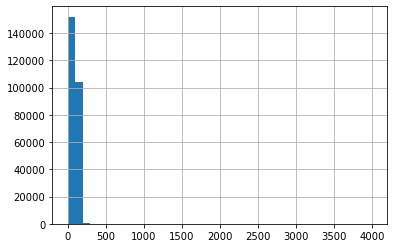

In [35]:
# print(train_df['title1_en'].str.len().value_counts())
# train_df['title1_en'].str.len().plot(kind='hist')
train_df['title2_en'].str.len().hist(bins=40)

unrelated    175598
agreed        74238
disagreed      6606
Name: label, dtype: int64


<AxesSubplot:ylabel='Frequency'>

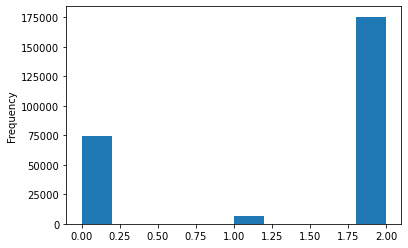

In [36]:
print(train_df['label'].value_counts())
train_df['label_num'].plot(kind="hist")

In [10]:

from numpy.random import binomial
np.random.seed(0)


grouper = train_df.groupby("label_num")
sizes = grouper.size()

fracs = (sizes.min()) / sizes

test  = pd.DataFrame()
train = pd.DataFrame()

for grp, data in grouper: # reuse the grouper!
    mask = binomial(1, fracs.loc[grp], data.shape[0]).astype(bool)
    train = train.append(data[mask])
    test  =  test.append(data[~mask])


/var/folders/g6/ffg782y56_s5b_cvljcm9_sc0000gn/T/ipykernel_51672/607805543.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(data[mask])
/var/folders/g6/ffg782y56_s5b_cvljcm9_sc0000gn/T/ipykernel_51672/607805543.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test  =  test.append(data[~mask])
/var/folders/g6/ffg782y56_s5b_cvljcm9_sc0000gn/T/ipykernel_51672/607805543.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(data[mask])
/var/folders/g6/ffg782y56_s5b_cvljcm9_sc0000gn/T/ipykernel_51672/607805543.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test  =  test.append(data[~mask]

label_num
0    6583
1    6606
2    6672
dtype: int64

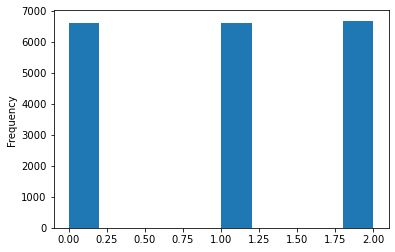

In [11]:
train.label_num.plot(kind="hist")
train.groupby("label_num").size()

<class 'str'>
